In [1]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np,numpy  
import cv2
import sys
import tensorflow as tf
np.set_printoptions(threshold=np.inf)#print全部信息

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [14]:
# #tensorflow 标准化
# img_dataset=[]

# for i in range(1,597):
#     img = cv2.imread("/home/fengchao/桌面/facedata/78points_shapefree/"+str(i)+".jpg")
#     std_img=tf.image.per_image_standardization(img)
#     with tf.Session() as sess:
#         result=sess.run(std_img)
#         result=result
#     img_dataset.append(result)
# img_dataset=np.array(img_dataset)
# print(img_dataset.shape)  

In [15]:
#标准化
img_dataset=[]
for i in range(1,597):
    img = cv2.imread("/home/fengchao/桌面/facedata/78points_shapefree/"+str(i)+".jpg")
    img=np.reshape(img,(172800,3))
# #以整体方式计算均值和标准差
#     img_dataset.append(img)
# img_dataset=np.reshape(img_dataset,(102988800,3))
# aver_img1=np.mean(img_dataset,axis=0)
# std_img1=np.std(img_dataset,axis=0)
# img_dataset=(img_dataset-aver_img1)/std_img1

#以每张图片计算均值和标准差
    aver_img=np.mean(img,axis=0)
    std_img=np.std(img,axis=0)
    img=(img-aver_img)/std_img
#     img=img*0.18+0.35
    img_dataset.append(np.reshape(img,(480,360,3)))
    
#     for i in range(0,len(img_dataset)):
#         for j in range(480):
#             for k in range(360):
#                 for m in range(3):
#                     if (img_dataset[i][j][k][m]>1):
#                         print(img_dataset[i][j][k][m])

In [3]:
img_dataset=np.reshape(np.array(img_dataset),(596,148101))
pca=PCA(n_components=50,svd_solver="full")
pca.fit(img_dataset)
print("explained_variance_ratio",pca.explained_variance_ratio_)
print("components_.shape",pca.components_.shape)
print("explained_variance",pca.explained_variance_)
print("singular_values",pca.singular_values_)

explained_variance_ratio [0.186071   0.10820211 0.07190159 0.0582152  0.03480013 0.02809534
 0.02454214 0.01974161 0.01877804 0.0166839  0.01450767 0.01366151
 0.01274402 0.0125767  0.01130907 0.01033478 0.00949025 0.00835004
 0.00772052 0.00733964 0.00708939 0.00634253 0.00610695 0.00594412
 0.00539488 0.00525983 0.00501775 0.00489221 0.00459625 0.00447695
 0.00434769 0.00427243 0.0041238  0.00396746 0.00381711 0.00368645
 0.00358913 0.00354617 0.00334844 0.00321656 0.00314485 0.00308813
 0.00300214 0.00285759 0.00280051 0.00271594 0.00268008 0.00259747
 0.00246626 0.00242899]
components_.shape (50, 148101)
explained_variance [4348.24193898 2528.54531798 1680.24836167 1360.41495763  813.23465287
  656.55217382  573.51859617  461.3362931   438.81886788  389.88143901
  339.02572619  319.25199764  297.81146494  293.90152067  264.27848916
  241.51062103  221.77502875  195.12980438  180.41875709  171.51795139
  165.66994003  148.21679651  142.71167395  138.90645417  126.07144871
  122.9154

In [18]:
pca_points=pca.components_
# print(pca_points.shape)
pc1=pca_points[0,:]
pc2=pca_points[1,:]
pc3=pca_points[2,:]
pc4=pca_points[3,:]
pc5=pca_points[4,:]
pc6=pca_points[5,:]
pc7=pca_points[6,:]
pc8=pca_points[7,:]
pc9=pca_points[8,:]
pc10=pca_points[9,:]

# for i in range (len(pc7)):
#     if (i>0):
#         ed=ed+np.square(pc2[i])
#     else:
#         ed= np.square(pc2[i])
# print(np.sqrt(ed))
    
# for i in range(10):
#     print(pca_points[i,:])

(49367, 2)
(480, 630, 3)


In [29]:
# pc1=np.reshape(pc1,(480, 360, 3))
# pc1=3*pc1*pca.explained_variance_[0]**0.5*std_img1+aver_img1
# pc2=np.reshape(pc2,(480, 360, 3))
# pc2=3*pc2*pca.explained_variance_[0]**0.5*std_img1+aver_img1
# pc3=np.reshape(pc3,(480, 360, 3))
# pc3=3*pc3*pca.explained_variance_[0]**0.5*std_img1+aver_img1
# pc4=np.reshape(pc4,(480, 360, 3))
# pc4=3*pc4*pca.explained_variance_[0]**0.5*std_img1+aver_img1
# pc5=np.reshape(pc5,(480, 360, 3))
# pc5=3*pc5*pca.explained_variance_[0]**0.5*std_img1+aver_img1

pc1=np.reshape(pc1,(480, 360, 3))
pc1=4*pc1*np.sqrt(pca.singular_values_[0])
pc2=np.reshape(pc2,(480, 360, 3))
pc2=4*pc2*np.sqrt(pca.singular_values_[1])
pc3=np.reshape(pc3,(480, 360, 3))
pc3=4*pc3*np.sqrt(pca.singular_values_[2])
pc4=np.reshape(pc4,(480, 360, 3))
pc4=4*pc4*np.sqrt(pca.singular_values_[3])
pc5=np.reshape(pc5,(480, 360, 3))
pc5=4*pc5*np.sqrt(pca.singular_values_[4])
pc6=np.reshape(pc6,(480, 360, 3))
pc6=4*pc6*np.sqrt(pca.singular_values_[5])
pc7=np.reshape(pc7,(480, 360, 3))
pc7=4*pc7*np.sqrt(pca.singular_values_[6])
pc8=np.reshape(pc8,(480, 360, 3))
pc8=4*pc8*np.sqrt(pca.singular_values_[7])
pc9=np.reshape(pc9,(480, 360, 3))
pc9=4*pc9*np.sqrt(pca.singular_values_[8])
pc10=np.reshape(pc10,(480, 360, 3))
pc10=4*pc10*np.sqrt(pca.singular_values_[9])


ValueError: cannot reshape array of size 148101 into shape (480,360,3)

In [9]:
#输出特征向量到txt文档
pc2=np.reshape(pc2,(172800,3))
points=[]
for i in range(0, len(pc2)):
    x = pc2[i,0]
    y = pc2[i,1]
    z = pc2[i,2]
    points.append((x,y,z))
path="/home/fengchao/桌面/pc2.txt"
np.savetxt(path,points,fmt='%f %f %f')

In [7]:
##Tensorflow 标准化
# img = cv2.imread("/home/fengchao/桌面/facedata/average_face.jpg")
# std_img=tf.image.per_image_standardization(img)
# with tf.Session() as sess:
#     ave_face=sess.run(std_img)
  
#手动标准化
img = cv2.imread("/home/fengchao/桌面/facedata/average_face.jpg")
img=np.reshape(img,(172800,3))
# np.savetxt("/home/fengchao/桌面/img.txt",img)
aver=np.mean(img,axis=0)
std=np.std(img,axis=0)
img=np.reshape(img,(480,360,3))
ave_face=(img-aver)/std

i=(ave_face+pc1)*std+aver
j=(ave_face-pc1)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)

cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc1',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc1',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc1.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc1.jpg",np.uint8(j))

i=(ave_face+pc2)*std+aver
j=(ave_face-pc2)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc2',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc2',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc2.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc2.jpg",np.uint8(j))

i=(ave_face+pc3)*std+aver
j=(ave_face-pc3)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc3',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc3',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc3.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc3.jpg",np.uint8(j))

i=(ave_face+pc4)*std+aver
j=(ave_face-pc4)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc4',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc4',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc4.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc4.jpg",np.uint8(j))

i=(ave_face+pc5)*std+aver
j=(ave_face-pc5)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc5',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc5',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc5.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc5.jpg",np.uint8(j))
# cv2.imshow('average face',ave_face)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()
# pc1p=ave_face-pc1
# cv2.imshow('pca1-3sd',pc1p)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [9]:
#手动标准化
img = cv2.imread("/home/fengchao/桌面/facedata/average_face.jpg")
img=np.reshape(img,(172800,3))
# np.savetxt("/home/fengchao/桌面/img.txt",img)
aver=np.mean(img,axis=0)
std=np.std(img,axis=0)
img=np.reshape(img,(480,360,3))
ave_face=(img-aver)/std

i=(ave_face+pc1)*std+aver
j=(ave_face-pc1)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc1',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc1',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc1.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc1.jpg",np.uint8(j))


i=(ave_face+pc2)*std+aver
j=(ave_face-pc2)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc2',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc2',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc2.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc2.jpg",np.uint8(j))


i=(ave_face+pc3)*std+aver
j=(ave_face-pc3)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)           
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc3',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc3',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc3.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc3.jpg",np.uint8(j))

i=(ave_face+pc4)*std+aver
j=(ave_face-pc4)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc4',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc4',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc4.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc4.jpg",np.uint8(j))

i=(ave_face+pc5)*std+aver
j=(ave_face-pc5)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc5',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc5',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc5.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc5.jpg",np.uint8(j))

True

In [10]:
def plot_gallery(images, titles,n_row=5, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
#         cv2.imshow('average face',images[i])
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()

In [11]:
plot_imgs=[]
plot_imgs.append(ave_face+pc1)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc1)
plot_imgs.append(ave_face+pc2)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc2)
plot_imgs.append(ave_face+pc3)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc3)
plot_imgs.append(ave_face+pc4)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc4)
plot_imgs.append(ave_face+pc5)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc5)
plot_imgs=np.array(plot_imgs)
plot_titles=[]
plot_titles.append("ave_face+pc1")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc1")
plot_titles.append("ave_face+pc2")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc2")
plot_titles.append("ave_face+pc3")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc3")
plot_titles.append("ave_face+pc4")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc4")
plot_titles.append("ave_face+pc5")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc5")
plot_titles=np.array(plot_titles)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

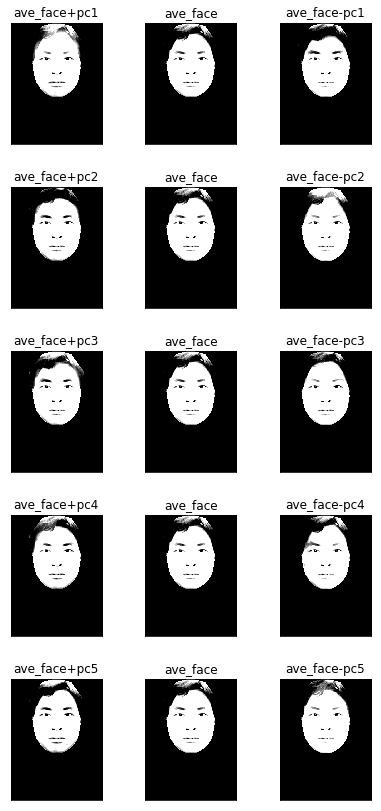

In [12]:
plot_gallery(plot_imgs,plot_titles)